In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the data from the Excel file
df = pd.read_excel('Data_Train.xlsx')

In [3]:
print(df.head(10))

             Airline Date_of_Journey    Source Destination  \
0             IndiGo      24/03/2019  Banglore   New Delhi   
1          Air India       1/05/2019   Kolkata    Banglore   
2        Jet Airways       9/06/2019     Delhi      Cochin   
3             IndiGo      12/05/2019   Kolkata    Banglore   
4             IndiGo      01/03/2019  Banglore   New Delhi   
5           SpiceJet      24/06/2019   Kolkata    Banglore   
6        Jet Airways      12/03/2019  Banglore   New Delhi   
7        Jet Airways      01/03/2019  Banglore   New Delhi   
8        Jet Airways      12/03/2019  Banglore   New Delhi   
9  Multiple carriers      27/05/2019     Delhi      Cochin   

                   Route Dep_Time  Arrival_Time Duration Total_Stops  \
0              BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1  CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2  DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3        CCU → NAG → BLR    1

# Step 1: Data Preprocessing


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
missing_data = df[df['Route'].isnull() | df['Total_Stops'].isnull()]
print(missing_data)

        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480  


In [7]:
df['Route'].mode()[0]

'DEL → BOM → COK'

In [8]:
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])


In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.duplicated().sum()

220

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10463 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10463 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.9+ KB


In [14]:
# Convert 'Date_of_Journey' to datetime format and extract day and month
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [15]:
# Convert 'Dep_Time' and 'Arrival_Time' to datetime format and extract hour and minute
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.minute

In [16]:
# Handle 'Arrival_Time' separately due to potential date information included
arrival_times = df['Arrival_Time'].str.extract(r'(\d{2}:\d{2})')
df['Arrival_Hour'] = pd.to_datetime(arrival_times[0], format='%H:%M').dt.hour
df['Arrival_Minute'] = pd.to_datetime(arrival_times[0], format='%H:%M').dt.minute

In [17]:
# Drop the original columns that have been transformed
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

In [18]:
# Convert 'Duration' to total minutes
duration = df['Duration'].str.extract(r'(?:(\d+)h)?\s*(?:(\d+)m)?')
duration = duration.fillna(0).astype(int)
df['Duration_Minutes'] = duration[0] * 60 + duration[1]

In [19]:
# Drop the original 'Duration' column
df.drop(['Duration'], axis=1, inplace=True)

In [20]:
df['Total_Stops'] = df['Total_Stops'].str.extract('(\d+)').fillna(0).astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\thes Computer\AppData\Local\Temp\ipykernel_22112\205611282.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Total_Stops'] = df['Total_Stops'].str.extract('(\d+)').fillna(0).astype(int)


In [21]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,No info,4107,9,4,19,55,22,25,150
10679,Air India,Kolkata,Banglore,CCU → BLR,0,No info,4145,27,4,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,No info,7229,27,4,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,0,No info,12648,1,3,11,30,14,10,160


# Visualization

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap

In [23]:
px.histogram(data_frame=df,x="Airline")

In [24]:
df["Source"].value_counts()

Source
Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [25]:
px.histogram(data_frame=df,x="Source")

In [26]:
px.histogram(data_frame=df,x="Destination")

In [27]:
px.histogram(data_frame=df,x="Route")

In [28]:
fig = px.histogram(data_frame=df, x="Route", color_discrete_sequence=px.colors.diverging.Tealrose)
fig.update_layout(title='Histogram of Route', xaxis_title='Route', yaxis_title='Count')
fig.show()


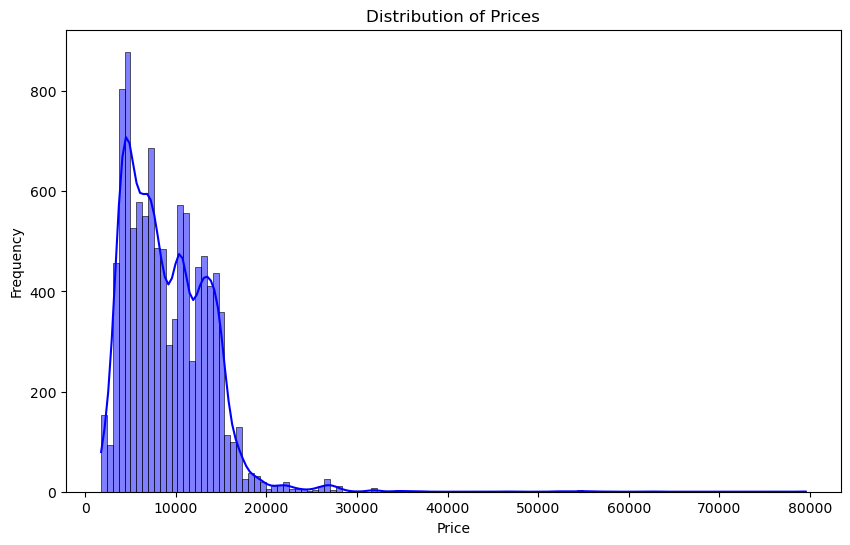

In [29]:
# Visualization 1: Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='blue') 
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


C:\Users\thes Computer\AppData\Local\Temp\ipykernel_22112\553498715.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




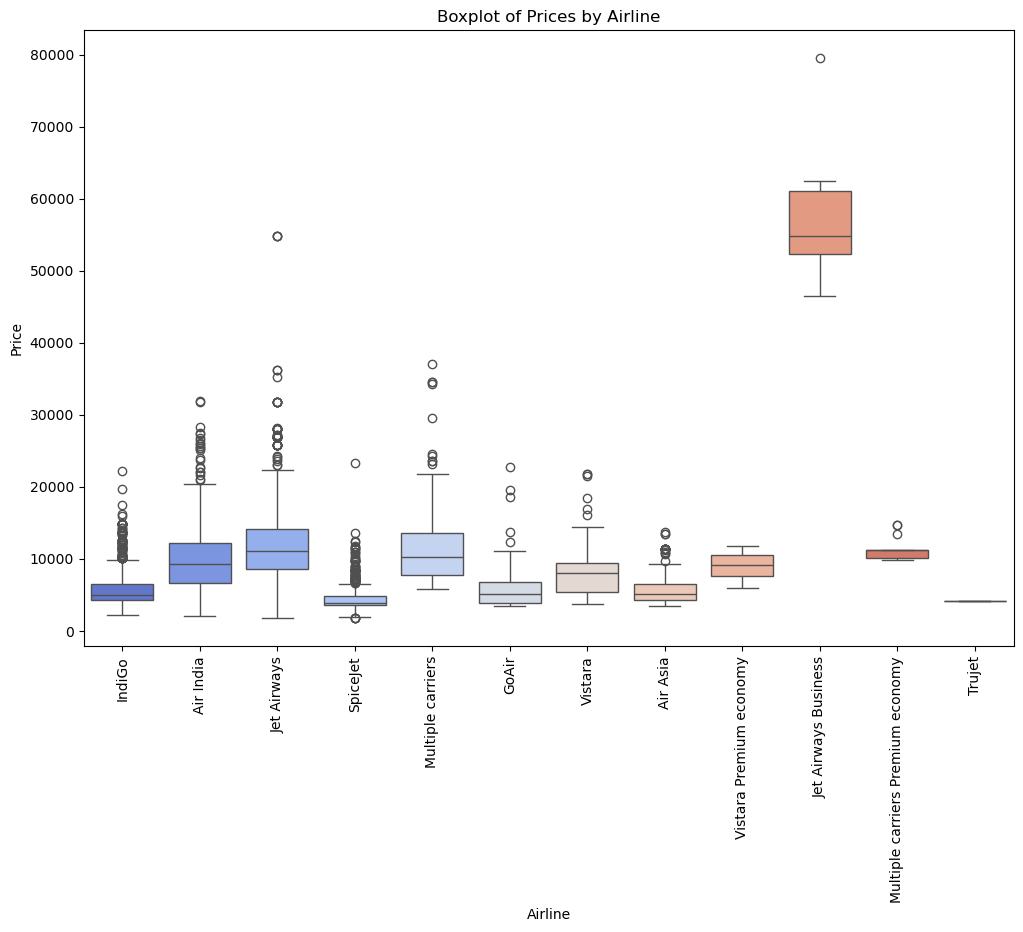

In [30]:
# Visualization 2: Boxplot of Prices by Airline
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=df, palette='coolwarm')
plt.title('Boxplot of Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

Boxplot of Prices by Airline:

This boxplot shows the distribution of ticket prices for each airline. It helps to identify the median, quartiles, and potential outliers for each airline.


C:\Users\thes Computer\AppData\Local\Temp\ipykernel_22112\3270494302.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




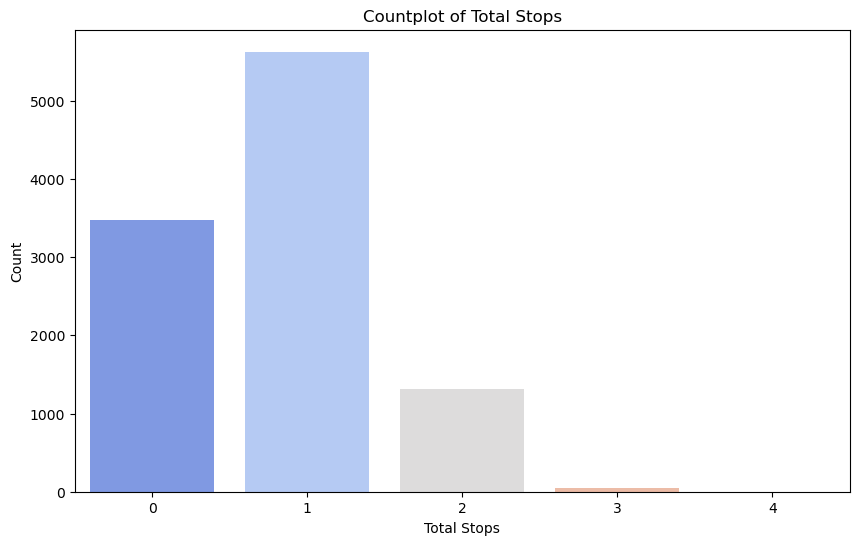

In [31]:
# Visualization 3: Countplot of Total Stops
plt.figure(figsize=(10, 6))
sns.countplot(x='Total_Stops', data=df, palette='coolwarm')
plt.title('Countplot of Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Count')
plt.show()

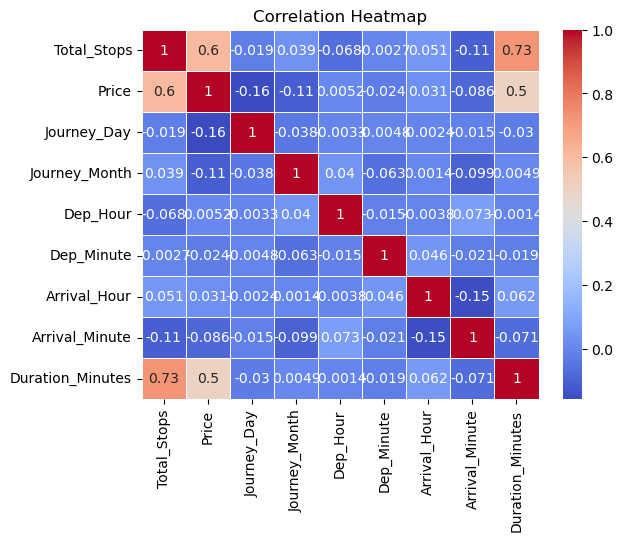

In [32]:

numeric_df = df.select_dtypes(include=['int'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10463 non-null  object
 1   Source            10463 non-null  object
 2   Destination       10463 non-null  object
 3   Route             10463 non-null  object
 4   Total_Stops       10463 non-null  int32 
 5   Additional_Info   10463 non-null  object
 6   Price             10463 non-null  int64 
 7   Journey_Day       10463 non-null  int32 
 8   Journey_Month     10463 non-null  int32 
 9   Dep_Hour          10463 non-null  int32 
 10  Dep_Minute        10463 non-null  int32 
 11  Arrival_Hour      10463 non-null  int32 
 12  Arrival_Minute    10463 non-null  int32 
 13  Duration_Minutes  10463 non-null  int32 
dtypes: int32(8), int64(1), object(5)
memory usage: 899.2+ KB


In [34]:
# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           10463 non-null  int32
 1   Source            10463 non-null  int32
 2   Destination       10463 non-null  int32
 3   Route             10463 non-null  int32
 4   Total_Stops       10463 non-null  int32
 5   Additional_Info   10463 non-null  int32
 6   Price             10463 non-null  int64
 7   Journey_Day       10463 non-null  int32
 8   Journey_Month     10463 non-null  int32
 9   Dep_Hour          10463 non-null  int32
 10  Dep_Minute        10463 non-null  int32
 11  Arrival_Hour      10463 non-null  int32
 12  Arrival_Minute    10463 non-null  int32
 13  Duration_Minutes  10463 non-null  int32
dtypes: int32(13), int64(1)
memory usage: 694.8 KB


In [36]:
df.to_excel('Data_Processed.xlsx', index=False)

# Visualization

## Step 2: Split the data into training and testing 




In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

# from xgboost import XGBClassifier

In [38]:
df_Processed = pd.read_excel('Data_Processed.xlsx')

In [39]:
X = df_Processed.drop(['Price'], axis=1)
y = df_Processed['Price']

In [40]:
Num_Columns = X.select_dtypes(include="number")


In [41]:
Num_Steps = [
    ("Num_Imputer", KNNImputer()),  
    ("Scaler", StandardScaler())   
]
Num_Pipeline = Pipeline(steps=Num_Steps)


In [42]:
Transformer = ColumnTransformer(
    transformers=[
        ('Num', Num_Pipeline, Num_Columns.columns),
    ],
    remainder='passthrough' #drop
)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
models = {
    "RandomForestRegressor": RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42),
    "LinearRegression": LinearRegression(),
    "SVR": SVR()
}

In [45]:
results = {}
for model_name, model in models.items():

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    results[model_name] = {
        "Mean Squared Error": mse,
        "R2 Score": r2,
        "Training Score": round(train_score*100,2),
        "Testing Score": round(test_score*100,2),
        "Overfitting": train_score - test_score > 0.1
    }


In [47]:
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R2 Score: {result['R2 Score']}")
    print(f"Training Score: {result['Training Score']} %")
    print(f"Testing Score: {result['Testing Score']} %")
    print(f"Overfitting: {result['Overfitting']}")
    print("-" * 30)  

Model: RandomForestRegressor
Mean Squared Error: 2271046.365273098
R2 Score: 0.8911536199423897
Training Score: 95.04 %
Testing Score: 89.12 %
Overfitting: False
------------------------------
Model: LinearRegression
Mean Squared Error: 11584200.228407439
R2 Score: 0.44479413542353374
Training Score: 43.39 %
Testing Score: 44.48 %
Overfitting: False
------------------------------
Model: SVR
Mean Squared Error: 17715824.778757725
R2 Score: 0.150918525315616
Training Score: 14.76 %
Testing Score: 15.09 %
Overfitting: False
------------------------------
